# Контест № 1: Линейная регрессия

## Выполнил: Некрасов Константин М8О-310Б

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Сначала загрузим обучающую выборку, и начнём её обработку

In [3]:
train = pd.read_csv('train.csv')
train

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверим, есть ли пустые строки

In [5]:
train[train.isnull().all(axis=1)]

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим пустые строки

In [7]:
train.dropna(how='all', inplace=True) 

train[train.isnull().all(axis=1)] #выводим для достоверности

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


Визуализируем переменную, которую нужно предсказать, т.е. RiscScore

In [9]:
import seaborn as sns

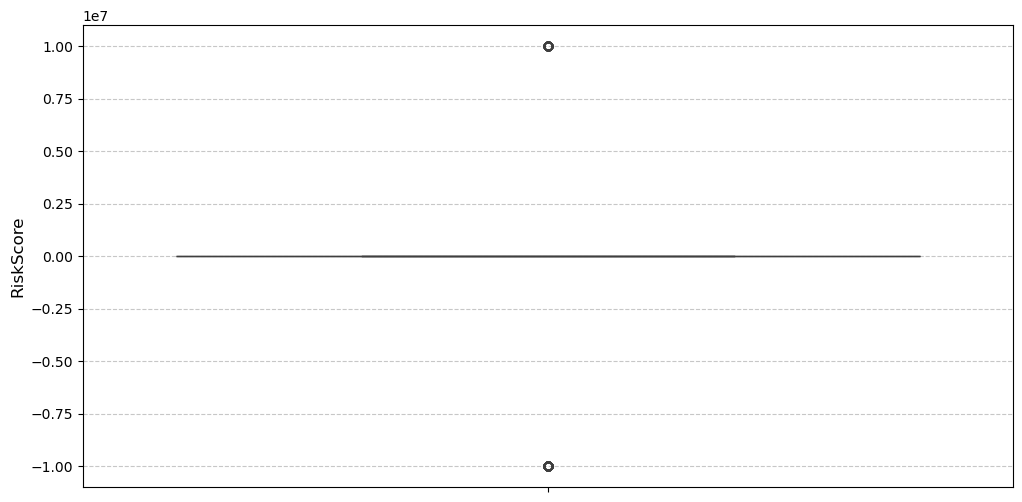

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=train['RiskScore'])
plt.ylabel('RiskScore', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

По изображению видно, что в выборке есть значения в районе -1*10^7 и 10^7. Эти значения аномальны, поэтому найдём их.

In [13]:
q1 = train['RiskScore'].quantile(0.25)
q3 = train['RiskScore'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train[(train['RiskScore'] < lower_bound) | (train['RiskScore'] > upper_bound)]
outliers

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
33,2003-03-05,37.0,300000.0,850.0,50557.0,60.0,Single,3.0,Own,642.0,...,Employed,Associate,15.0,1909.0,0.140557,0.167621,1250.013168,0.075681,1.0,-9999999.0
56,2010-09-30,39.0,15000.0,761.0,27703.0,36.0,Married,1.0,Rent,1197.0,...,Self-Employed,High School,18.0,38079.0,0.142203,0.140802,947.902662,1.715922,0.0,-9999999.0
83,1986-07-23,46.0,15000.0,397.0,24498.0,48.0,Single,0.0,Mortgage,474.0,...,Employed,Bachelor,23.0,8790.0,0.330998,0.343377,944.937492,1.135150,0.0,-9999999.0
183,1981-10-07,70.0,32492.0,676.0,83425.0,36.0,Married,0.0,Rent,817.0,...,Employed,Associate,46.0,30768.0,0.240425,0.262538,3372.535260,1.547286,0.0,-9999999.0
198,2010-02-08,31.0,66265.0,700.0,12173.0,36.0,Divorced,1.0,Rent,970.0,...,Employed,Doctorate,10.0,8150.0,0.157173,0.153609,424.135327,0.252465,0.0,-9999999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,2006-12-01,48.0,75435.0,756.0,19637.0,60.0,Single,3.0,Mortgage,153.0,...,Employed,Bachelor,25.0,1390.0,0.156637,0.143762,460.757219,0.097635,1.0,-9999999.0
9987,1980-11-01,53.0,15000.0,527.0,29202.0,36.0,Single,2.0,Mortgage,1036.0,...,Employed,High School,31.0,72854.0,0.260702,0.241976,1148.709131,1.747767,0.0,-9999999.0
10586,1986-04-08,55.0,148482.0,716.0,17034.0,48.0,Married,0.0,Rent,62.0,...,Self-Employed,Bachelor,32.0,27271.0,0.164034,0.152687,476.392649,0.043512,1.0,10000000.0
10601,2011-03-26,45.0,52406.0,NaN,NaN,24.0,Married,0.0,Rent,NaN,...,Employed,High School,23.0,NaN,NaN,0.170362,1258.550967,0.487170,0.0,10000000.0


Аномальные значения равняются -9999999 и 10000000, и таких выбросов всего 215. Удалим из выборки подобные аномалии.

In [15]:
if not outliers.empty:
    train = train.drop(outliers.index)

outliers = train[(train['RiskScore'] < lower_bound) | (train['RiskScore'] > upper_bound)]
outliers # выводим для проверки

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore


Посмотрим текущий вид на графике:

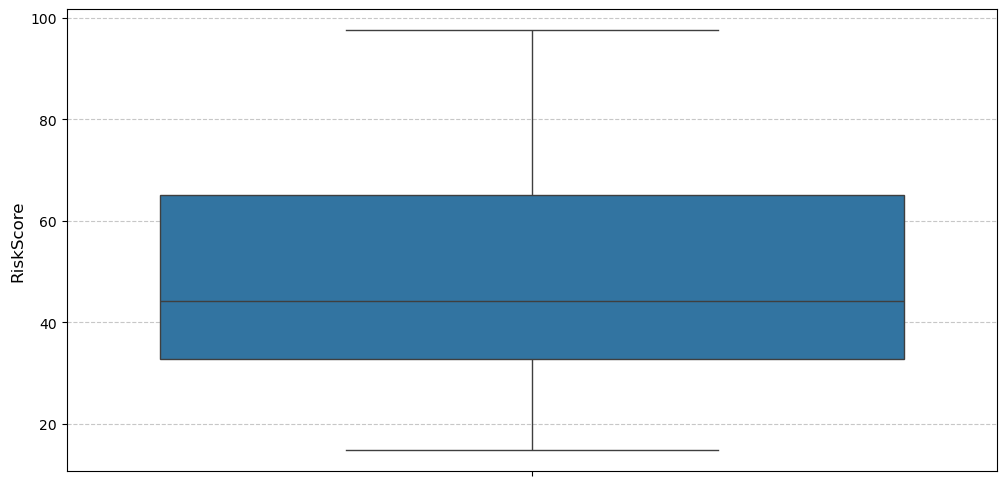

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=train['RiskScore'])
plt.ylabel('RiskScore', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Проверим наличие пропусков по признакам 

In [19]:
train.isnull().sum()

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   485
LoanAmount                    485
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           485
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             485
LoanPurpose                   485
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        485
TotalAssets                   485
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

Выделим для раздельной работы категориальные и скалярные признаки

In [21]:
categorical = train.select_dtypes(include=['object']).columns
numerical = train.select_dtypes(include=['int64', 'float64']).columns

categorical.tolist()

['ApplicationDate',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose',
 'EmploymentStatus',
 'EducationLevel']

In [23]:
numerical.tolist()

['Age',
 'AnnualIncome',
 'CreditScore',
 'LoanAmount',
 'LoanDuration',
 'NumberOfDependents',
 'MonthlyDebtPayments',
 'CreditCardUtilizationRate',
 'NumberOfOpenCreditLines',
 'NumberOfCreditInquiries',
 'DebtToIncomeRatio',
 'BankruptcyHistory',
 'PreviousLoanDefaults',
 'PaymentHistory',
 'LengthOfCreditHistory',
 'SavingsAccountBalance',
 'CheckingAccountBalance',
 'TotalAssets',
 'TotalLiabilities',
 'MonthlyIncome',
 'UtilityBillsPaymentHistory',
 'JobTenure',
 'Experience',
 'NetWorth',
 'BaseInterestRate',
 'InterestRate',
 'MonthlyLoanPayment',
 'TotalDebtToIncomeRatio',
 'LoanApproved',
 'RiskScore']

Заполним пропущенные значения для категориальных признаков при помощи моды

In [25]:
for col in categorical:
    mode = train[col].mode()[0]
    train.fillna({col: mode}, inplace=True)

train[categorical].isnull().sum()

ApplicationDate        0
MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

И для скалярных значений при помощи K-метода

In [27]:
from sklearn.impute import KNNImputer

In [29]:
imputer = KNNImputer(n_neighbors=5)

train[numerical] = imputer.fit_transform(train[numerical])

train[numerical].isnull().sum()

Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
NumberOfDependents            0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
Experience                    0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyLoanPayment            0
TotalDebtToIncomeRatio        0
LoanApproved                  0
RiskScore                     0
dtype: int64

Теперь закодируем категориальные данные при помощи one hot encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder(sparse_output=False)

categorical_encoded = encoder.fit_transform(train[categorical[1:]])
categorical_encDF = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical[1:]))

categorical_encDF

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Нормализуем скалярные данные при помощи z-нормализации

In [35]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

numerical_train = train[numerical]
numerical_train = scaler.fit_transform(numerical_train)

numerical_DF = pd.DataFrame(numerical_train, columns=numerical)
numerical_DF

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,-1.108451,-0.558650,-0.741546,-0.456579,0.268131,-0.400573,1.113292,-0.831696,-0.591929,0.022255,...,1.005394,-0.432306,-1.203829,-0.261972,0.613635,0.530862,-0.421499,-0.256612,-1.023843,1.033513
1,1.304533,0.350659,0.986774,-0.499734,-0.710632,-0.400573,-0.679621,-0.682975,-0.016743,-0.989281,...,0.103462,-1.340227,1.355815,-0.279778,-1.217712,-1.108086,-0.417278,-0.520888,0.976712,-1.152068
2,0.959821,1.454535,0.986774,0.316767,-0.710632,-1.105987,-0.000180,1.003963,-0.016743,-0.989281,...,1.067638,-0.886267,0.914497,0.275158,-0.979556,-0.877497,0.140186,-0.496417,0.976712,-0.804495
3,-1.280807,-0.836197,0.969549,-0.387239,-0.221251,-1.105987,-0.797256,-0.602935,2.284003,-0.989281,...,0.746299,-0.886267,-1.556883,-0.319022,-1.062226,-0.904643,-0.429240,-0.326289,0.976712,-0.663975
4,1.304533,1.454535,0.986774,0.024230,-0.221251,0.304842,0.032271,-0.069843,-0.016743,0.022255,...,0.846062,0.021655,1.179288,-0.329446,-0.958211,-1.150906,-0.238737,-0.518511,0.976712,-0.986682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-0.806534,0.757512,2.421084,-0.547789,-0.435536,-0.591929,0.022255,...,0.759157,-1.340227,-0.144666,-0.298309,-0.987183,-0.948396,-0.689699,-0.558387,0.976712,-1.177820
10268,1.476889,1.454535,0.986774,-0.549252,-0.221251,0.304842,0.149906,1.211837,-1.167115,2.045329,...,0.013270,-0.432306,1.797133,0.030477,-1.125483,-0.971269,-0.517796,-0.532725,0.976712,-0.923256
10269,-1.022273,-1.006139,-2.171286,0.789457,1.736274,-0.400573,0.304047,0.238311,-0.591929,-0.989281,...,-0.377507,-0.886267,-1.115565,-0.081368,2.625161,2.080039,0.528373,1.639212,-1.023843,1.120324
10270,-1.453163,-1.006139,-2.159802,0.034726,0.757512,1.010256,-0.269928,1.333035,-0.591929,-0.989281,...,-0.184199,-0.886267,-1.556883,0.214220,2.181010,1.661568,-0.023003,0.723484,-1.023843,1.562277


Сконкатенируем категориальные и скалярные данные

In [39]:
numerical_DF = numerical_DF.reset_index(drop=True)
categorical_encDF = categorical_encDF.reset_index(drop=True)

result_train = pd.concat([numerical_DF, categorical_encDF], axis=1)
result_train

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,-1.108451,-0.558650,-0.741546,-0.456579,0.268131,-0.400573,1.113292,-0.831696,-0.591929,0.022255,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.304533,0.350659,0.986774,-0.499734,-0.710632,-0.400573,-0.679621,-0.682975,-0.016743,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.959821,1.454535,0.986774,0.316767,-0.710632,-1.105987,-0.000180,1.003963,-0.016743,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.280807,-0.836197,0.969549,-0.387239,-0.221251,-1.105987,-0.797256,-0.602935,2.284003,-0.989281,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.304533,1.454535,0.986774,0.024230,-0.221251,0.304842,0.032271,-0.069843,-0.016743,0.022255,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,-0.074315,1.454535,0.986774,-0.806534,0.757512,2.421084,-0.547789,-0.435536,-0.591929,0.022255,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,1.476889,1.454535,0.986774,-0.549252,-0.221251,0.304842,0.149906,1.211837,-1.167115,2.045329,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,-1.022273,-1.006139,-2.171286,0.789457,1.736274,-0.400573,0.304047,0.238311,-0.591929,-0.989281,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,-1.453163,-1.006139,-2.159802,0.034726,0.757512,1.010256,-0.269928,1.333035,-0.591929,-0.989281,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Определим корреляцию

In [41]:
correlation = pd.concat([result_train[numerical[:-1]], train['RiskScore']], axis=1).corr()
correlation['RiskScore'].sort_values(ascending=False)

RiskScore                     1.000000
AnnualIncome                  0.021954
LoanApproved                  0.020694
MonthlyIncome                 0.019937
CreditScore                   0.018099
Experience                    0.012315
BankruptcyHistory             0.009464
LengthOfCreditHistory         0.009230
NumberOfCreditInquiries       0.007821
Age                           0.007517
NumberOfDependents            0.007437
LoanAmount                    0.004288
CreditCardUtilizationRate     0.003413
UtilityBillsPaymentHistory    0.002939
PreviousLoanDefaults          0.002622
LoanDuration                  0.002244
TotalLiabilities              0.000643
MonthlyLoanPayment           -0.000004
NetWorth                     -0.001977
MonthlyDebtPayments          -0.002140
TotalAssets                  -0.002862
DebtToIncomeRatio            -0.004288
JobTenure                    -0.004654
PaymentHistory               -0.005268
NumberOfOpenCreditLines      -0.009433
TotalDebtToIncomeRatio   

Пройдя по столбцам корреляционной матрицы, уберём сильно коррелированные признаки

In [43]:
correlation_matrix = result_train.corr()

correlation_matrix

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
Age,1.000000,0.039188,0.053117,0.006182,0.016876,0.018831,-0.012077,0.023609,-0.005283,0.000534,...,0.007086,0.005366,0.000146,0.002874,-0.004477,0.013468,-0.015192,-0.012179,0.007510,0.000247
AnnualIncome,0.039188,1.000000,0.623128,0.003693,-0.019316,-0.003903,0.009900,-0.008005,-0.000165,0.015725,...,0.015770,-0.005157,0.004000,-0.006146,0.002149,-0.001670,0.011076,0.031160,-0.039948,0.037373
CreditScore,0.053117,0.623128,1.000000,-0.003328,-0.014949,-0.002657,0.005135,-0.010582,-0.002209,0.005330,...,0.021473,-0.007801,-0.000682,0.001003,-0.000300,0.004970,0.004914,0.021830,-0.030503,0.026538
LoanAmount,0.006182,0.003693,-0.003328,1.000000,-0.009562,0.003643,-0.001094,-0.014074,0.003901,0.002758,...,0.002573,-0.003193,-0.004978,0.003339,0.003663,-0.003283,0.006670,0.001020,0.002287,-0.011775
LoanDuration,0.016876,-0.019316,-0.014949,-0.009562,1.000000,0.004331,0.018433,-0.008362,0.006983,0.007285,...,-0.017708,0.013859,-0.013028,0.011796,0.005092,-0.022994,0.003129,0.010064,0.005706,0.012056
NumberOfDependents,0.018831,-0.003903,-0.002657,0.003643,0.004331,1.000000,-0.014726,0.004828,-0.017135,0.003358,...,0.000441,-0.008039,0.000840,-0.006011,0.007392,-0.017194,0.014865,0.010570,-0.003022,-0.001350
MonthlyDebtPayments,-0.012077,0.009900,0.005135,-0.001094,0.018433,-0.014726,1.000000,0.004718,-0.007864,0.026254,...,-0.010488,-0.021589,-0.007195,0.010290,-0.002740,-0.011846,-0.016035,-0.003521,0.024914,0.001630
CreditCardUtilizationRate,0.023609,-0.008005,-0.010582,-0.014074,-0.008362,0.004828,0.004718,1.000000,0.005489,0.015348,...,-0.003485,-0.009370,0.009450,-0.012234,0.001715,0.011116,-0.018266,-0.009929,0.007015,0.008677
NumberOfOpenCreditLines,-0.005283,-0.000165,-0.002209,0.003901,0.006983,-0.017135,-0.007864,0.005489,1.000000,0.004054,...,0.005819,0.003769,-0.000262,-0.000406,0.001048,0.005528,0.014116,-0.009989,-0.007509,-0.012248
NumberOfCreditInquiries,0.000534,0.015725,0.005330,0.002758,0.007285,0.003358,0.026254,0.015348,0.004054,1.000000,...,-0.001696,-0.000951,-0.001883,0.006158,-0.005812,0.007786,-0.008300,0.007970,0.005079,-0.012494


In [45]:
threshold = 0.9
columns_to_drop = set()

for col in correlation_matrix.columns:
    highly_corr = correlation_matrix[col][(correlation_matrix[col] > threshold) & (correlation_matrix[col] < 1.0)].index
    columns_to_drop.update(highly_corr)

result_train = result_train.drop(columns=columns_to_drop, axis=1)

result_train

,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,-0.741546,-0.456579,0.268131,-0.400573,1.113292,-0.831696,-0.591929,0.022255,-0.565636,-0.239230,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.986774,-0.499734,-0.710632,-0.400573,-0.679621,-0.682975,-0.016743,-0.989281,-0.752426,-0.239230,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.986774,0.316767,-0.710632,-1.105987,-0.000180,1.003963,-0.016743,-0.989281,-1.517632,4.326676,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.969549,-0.387239,-0.221251,-1.105987,-0.797256,-0.602935,2.284003,-0.989281,0.896740,-0.239230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.986774,0.024230,-0.221251,0.304842,0.032271,-0.069843,-0.016743,0.022255,-1.256910,-0.239230,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,0.986774,-0.806534,0.757512,2.421084,-0.547789,-0.435536,-0.591929,0.022255,-0.584172,-0.239230,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10268,0.986774,-0.549252,-0.221251,0.304842,0.149906,1.211837,-1.167115,2.045329,-0.661576,-0.239230,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10269,-2.171286,0.789457,1.736274,-0.400573,0.304047,0.238311,-0.591929,-0.989281,-0.518636,-0.239230,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10270,-2.159802,0.034726,0.757512,1.010256,-0.269928,1.333035,-0.591929,-0.989281,1.054357,-0.239230,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Теперь обучим модель с регуляризацией L1, с помощью кросс-валидации подберём параметры поиском по сетке и для наглядности выведем MSE метрику

In [47]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

Best params {'eps': 0.001, 'selection': 'random'}
MSE: 22.448811029302664


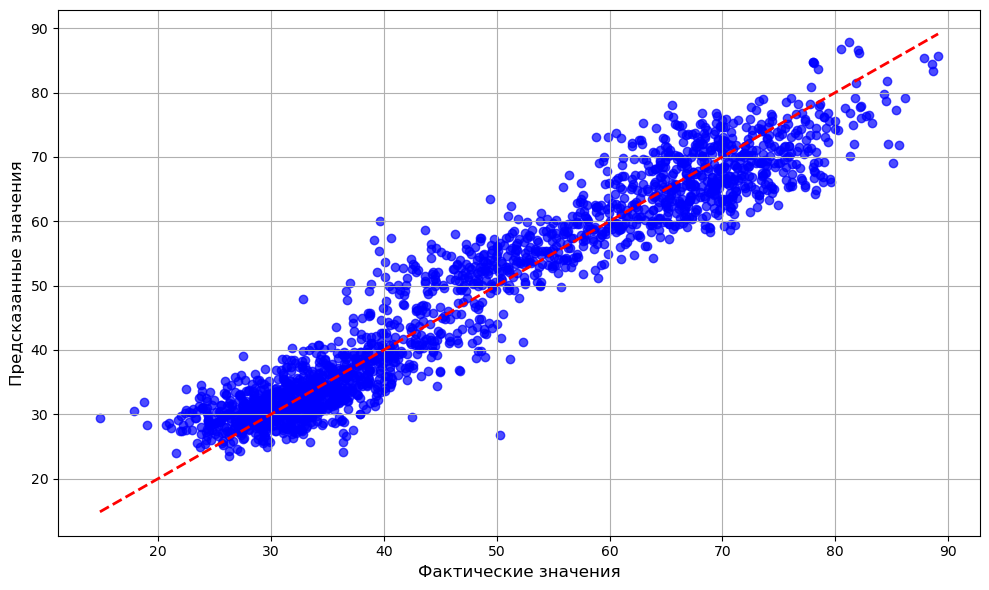

In [49]:
y = train['RiskScore']

result_train.drop(columns = ['RiskScore'], inplace = True)
X = result_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lasso = LassoCV(fit_intercept=True)
param_grid = {
    'eps': [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10, 100],
    'selection': ['cyclic', 'random']
}

grid_search = GridSearchCV(lasso, param_grid, cv=10)
grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_

print(f"Best params", grid_search.best_params_)
print(f"MSE:", mean_squared_error(best_lasso.predict(X_test), y_test))


plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_lasso.predict(X_test), alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Фактические значения', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Перед предсказанием по тестовой выборке, её нужно обработать также, как обучающую

In [51]:
test = pd.read_csv('test.csv', index_col='ID')

test

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
ID,,,,,,,,,,,,,,,,,,,,,
0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,376,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,2006-04-10,28,64653,674,65491,48,Single,2,Own,238,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2013-11-28,41,300000,768,16811,60,Single,1,Own,469,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,567,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,106,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,434,...,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,97,...,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,289,...,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0


In [53]:
test_cat_encoded = encoder.transform(test[categorical[1:]])
test_cat_encDF = pd.DataFrame(test_cat_encoded, columns=encoder.get_feature_names_out(categorical[1:]))

test_cat_encDF

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
num_test = test[numerical[:-1]]
num_test = scaler.fit_transform(num_test)

num_test_DF = pd.DataFrame(num_test, columns=numerical[:-1])
num_test_DF

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0.787875,0.638663,0.971893,-0.546054,0.267179,-1.071670,-0.336550,-1.300770,-0.556629,-0.998301,...,0.665486,0.801835,0.459492,0.478448,-0.345785,-1.005637,-0.765777,-0.535452,-0.510505,0.968108
1,-1.009910,-0.596647,-0.025652,1.190827,-0.222878,0.328657,-0.612864,-1.320560,0.589170,1.001902,...,-0.598856,0.064060,-0.890632,-1.271544,0.381564,0.341413,0.610032,0.762163,-0.073543,-1.032942
2,0.103005,1.444370,0.507128,-0.465971,0.267179,-0.371507,-0.150339,0.298636,1.162069,-0.998301,...,1.490128,0.176356,-0.890632,0.128449,-0.354983,-0.553050,-0.468442,-0.481443,-0.516557,0.968108
3,0.873484,1.444370,0.971893,0.620613,-0.712935,-1.071670,0.045884,1.639138,-0.556629,0.001800,...,1.490128,0.365987,-0.890632,0.740947,-0.351303,-0.856570,-1.026646,0.322696,-0.463079,0.968108
4,-0.410648,1.444370,-0.036987,0.728809,0.267179,3.129310,-0.877165,0.956348,-1.702428,-0.998301,...,1.490128,-0.395837,0.909534,-0.484048,0.727567,0.314531,0.377687,0.263987,-0.486155,0.968108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.017396,1.444370,0.971893,-0.606023,0.267179,-0.371507,-0.220418,-1.392589,1.162069,0.001800,...,1.490128,1.055349,-0.890632,0.128449,-0.344950,-1.024031,-1.080243,-0.576237,-0.523852,0.968108
4996,-0.068213,-0.506793,-0.603774,0.642497,-0.222878,-1.071670,-0.895185,-1.426408,-0.556629,0.001800,...,-0.506890,0.634481,-0.890632,-0.134049,-0.353450,0.705640,1.035522,0.469251,-0.235520,-1.032942
4997,0.274222,-1.027257,-1.272583,0.078546,0.757237,-0.371507,-0.510748,0.752251,-0.556629,-0.998301,...,-1.039585,-0.241855,0.459492,-0.046550,0.646120,1.357383,0.840036,-0.104318,0.494810,-1.032942
4998,1.130310,-0.303400,0.971893,-0.069980,1.737351,-0.371507,-0.662921,-0.921494,-1.129529,0.001800,...,-0.298716,1.457979,0.459492,1.090945,-0.358330,-0.546421,-0.377429,-0.392635,-0.457427,-1.032942


In [86]:
result_test = pd.concat([num_test_DF, test_cat_encDF], axis=1)

result_test

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,0.787875,0.638663,0.971893,-0.546054,0.267179,-1.071670,-0.336550,-1.300770,-0.556629,-0.998301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.009910,-0.596647,-0.025652,1.190827,-0.222878,0.328657,-0.612864,-1.320560,0.589170,1.001902,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.103005,1.444370,0.507128,-0.465971,0.267179,-0.371507,-0.150339,0.298636,1.162069,-0.998301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.873484,1.444370,0.971893,0.620613,-0.712935,-1.071670,0.045884,1.639138,-0.556629,0.001800,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.410648,1.444370,-0.036987,0.728809,0.267179,3.129310,-0.877165,0.956348,-1.702428,-0.998301,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.017396,1.444370,0.971893,-0.606023,0.267179,-0.371507,-0.220418,-1.392589,1.162069,0.001800,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,-0.068213,-0.506793,-0.603774,0.642497,-0.222878,-1.071670,-0.895185,-1.426408,-0.556629,0.001800,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.274222,-1.027257,-1.272583,0.078546,0.757237,-0.371507,-0.510748,0.752251,-0.556629,-0.998301,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,1.130310,-0.303400,0.971893,-0.069980,1.737351,-0.371507,-0.662921,-0.921494,-1.129529,0.001800,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Определим предсказания тестовой выборки

In [88]:
result_test = result_test[result_train.columns]

y_pred = best_lasso.predict(result_test)
y_pred

array([32.24877765, 58.13157174, 31.00350274, ..., 64.32561219,
       53.51323031, 81.25102688])

Запишем предсказания в отдельный датасет

In [92]:
predictions = pd.DataFrame(y_pred, index=test.index, columns=['RiskScore'])
predictions

,RiskScore
ID,
0,32.248778
1,58.131572
2,31.003503
3,34.321575
4,36.838792
...,...
4995,34.440309
4996,60.367067
4997,64.325612


Сохраним предсказания в файл `ex.csv`

In [95]:
predictions.to_csv('ex.csv')